In [1]:
import numpy as np
import pandas as pd

In [2]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
df1 = pd.read_csv('DrDoS_LDAP_new.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_7864\3717026788.py:1: DtypeWarning: Columns (80) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('DrDoS_LDAP_new.csv')


In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1[' Label']= label_encoder.fit_transform(df1[' Label'])
df1[' Label'].unique()

array([1, 0])

In [5]:
df1.drop('SimillarHTTP', axis=1, inplace=True)
df1.drop(' Fwd Packet Length Max', axis=1, inplace=True)
df1.drop(' Fwd Packet Length Min', axis=1, inplace=True)
df1.drop('Bwd Packet Length Max', axis=1, inplace=True)
df1.drop(' Bwd Packet Length Min', axis=1, inplace=True)
df1.drop(' Flow IAT Max', axis=1, inplace=True)
df1.drop(' Flow IAT Min', axis=1, inplace=True)
df1.drop(' Fwd IAT Max', axis=1, inplace=True)
df1.drop(' Fwd IAT Min', axis=1, inplace=True)
df1.drop(' Bwd IAT Max', axis=1, inplace=True)
df1.drop(' Bwd IAT Min', axis=1, inplace=True)
df1.drop(' Idle Max', axis=1, inplace=True)
df1.drop(' Idle Min', axis=1, inplace=True)
df1.drop(' Active Max', axis=1, inplace=True)
df1.drop(' Active Min', axis=1, inplace=True)

In [6]:
l = []
for col in df1:
    
    try:
        if sum(df1[col]) == 0:
            l.append(col)
    except:
        print(col)

In [7]:
df1.drop(l, axis=1, inplace=True)

In [8]:
import matplotlib.pyplot as plt

In [9]:
no = df1[df1[' Label'] == 0]
yes = df1[df1[' Label'] == 1]
print(len(no), len(yes))

1612 2179930


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1.dropna(inplace=True)

In [12]:
no = df1[df1[' Label'] == 0]
yes = df1[df1[' Label'] == 1]
print(len(no), len(yes))

1592 2141300


In [13]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

# Assuming your dataset is stored in a DataFrame called 'df'
# Separate the majority and minority classes
majority_class = df1[df1[' Label'] == 1]
minority_class = df1[df1[' Label'] == 0]

# Upsample the minority class to 50,000 samples
minority_upsampled = resample(minority_class, replace=True, n_samples=50000, random_state=42)

# Downsample the majority class to 50,000 samples
majority_downsampled = resample(majority_class, replace=False, n_samples=50000, random_state=42)

# Combine the upsampled minority and downsampled majority classes
balanced_df = pd.concat([minority_upsampled, majority_downsampled])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42)

In [14]:
no = balanced_df[balanced_df[' Label'] == 0]
yes = balanced_df[balanced_df[' Label'] == 1]
print(len(no), len(yes))

50000 50000


In [15]:
balanced_df.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Mean,Fwd Packet Length Std,...,Label,Source IP1,Source IP2,Source IP3,Source IP4,Destination IP1,Destination IP2,Destination IP3,Destination IP4,newtime
1828060,642,11765,17,1,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-119.675929
1440274,691,41507,17,2,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-121.447822
1744063,54607,53,17,54280,2,2,76.0,188.0,38.0,0.0,...,0,192,168,50,7,8,8,8,8,-120.060124
826984,997,49646,17,1,2,0,2928.0,0.0,1464.0,0.0,...,1,172,16,0,5,192,168,50,1,-124.222314
1519380,941,42639,17,2,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-121.070014


In [16]:
X = balanced_df.drop(columns = ' Label', axis=1)
y = balanced_df[' Label']

In [17]:
pip install shap numpy pandas


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.99975


C:\Users\User\miniconda3\envs\tf\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
import shap


explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)


# Waterfall Plot:

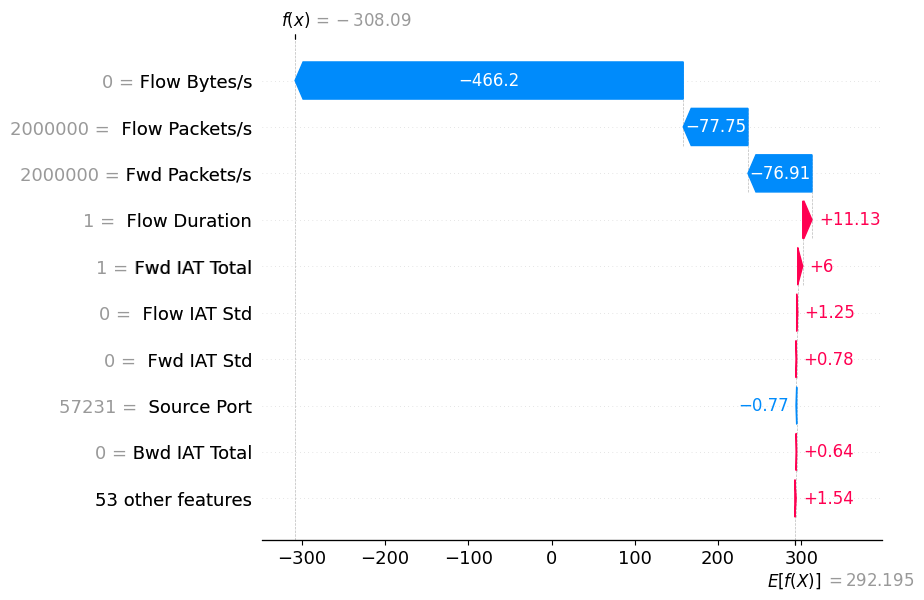

In [20]:
shap.plots.waterfall(shap_values[0], max_display=10)


# Force Plot:

In [21]:
shap.plots.force(shap_values[0])


# Mean SHAP Plot:

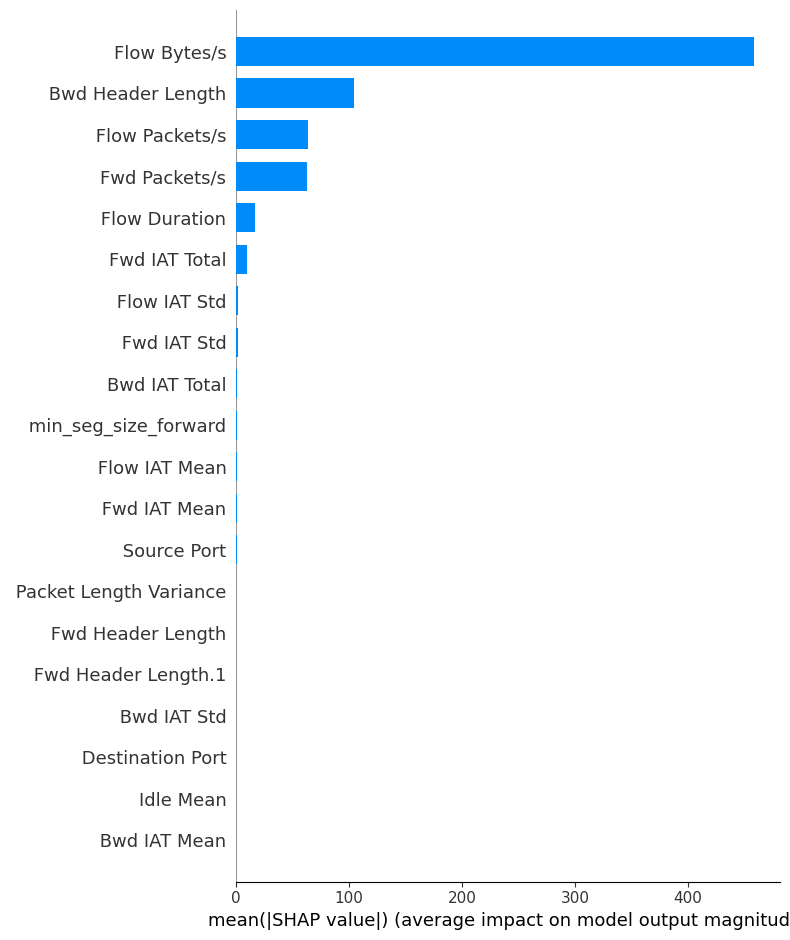

In [22]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


# Beeswarm Plot:

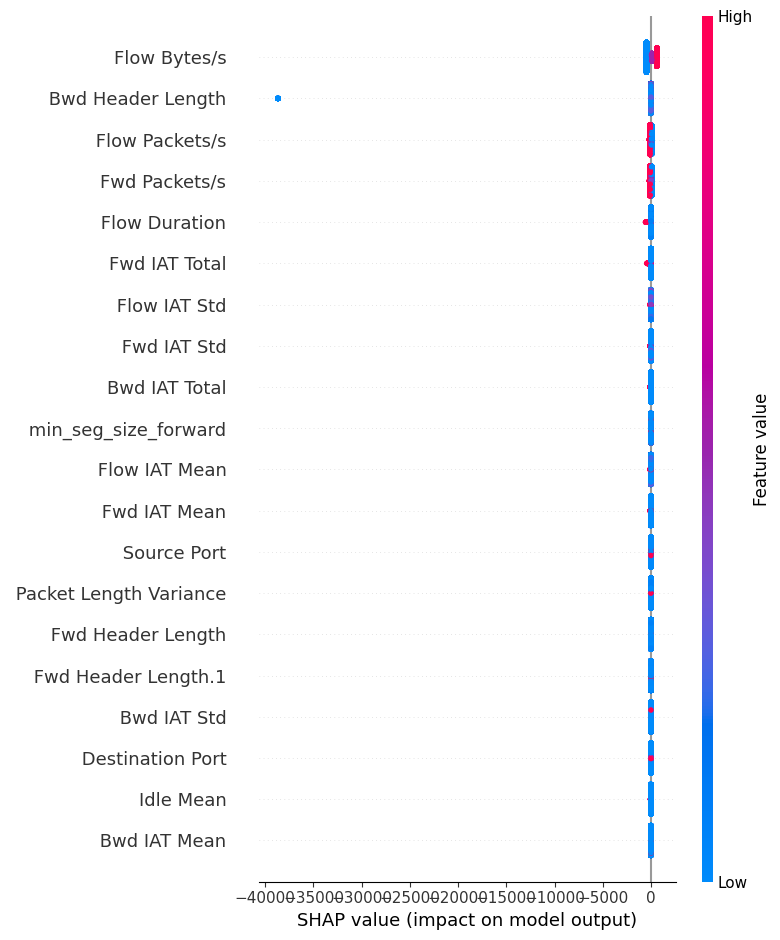

In [23]:
shap.summary_plot(shap_values, X_test)
